# Applied object-oriented programming

Teacher: [Carlos Natalino](https://www.chalmers.se/en/persons/carda/) / Examiner: [Paolo Monti](https://www.chalmers.se/en/persons/mpaolo/)

[Course channel on Chalmers Play](https://play.chalmers.se/channel/EEN060_EEN065_Applied_object-oriented_programming/300149)

Before you turn this assignment list in, make sure everything runs as expected.
First, **restart the kernel** and then **run all cells**.
Then, check if all the tests run correctly.
Note that if one of the problems present an error, the following ones **will not** be tested.

In case of discrepancies between the problem command and the tests, you should solve it having in mind the tests.

There are two types of cell:
1. *solution cells:* These are the cells where you write your answer, or modify the existing code to solve the problem.
2. *test cells:* These cells are used to test whether your solution is correct or not. If the tests run correctly, you should see a message `tests passed`. Otherwise, you should see an error message.

**Delete** the line `raise NotImplementedError()` from the problems that you solve.

**Do not delete or add any cell in this file.** All cells that you need are already in place.

If you want to execute a cell, select the cell and press **CTRL+Enter** (in Windows) or **CMD+Enter** (in macOS) or click on the **Run cell** button.

**Preparation:** Run the cell below every time you start working on this file, and every time you restart the kernel.

In [1]:
%load_ext autoreload
import os

# getting latest version of utils.py
# import requests
# response = requests.get("https://raw.githubusercontent.com/carlosnatalino/programming-assignments/refs/heads/main/utils.py")
# with open("utils.py", "wb") as f:
#     f.write(response.content)

if not os.path.exists("utils.py"):
    raise ValueError("It seems this file is in the wrong folder. "
          "Make sure to place it in the `programming-assignments` folder/project.")

# check if this file is within the same folder as the `utils.py` file.
try:
    from utils import export_cell_content
except:
    import sys
    raise ValueError("Did you select the right kernel that starts with venv?")

filename = 'validate_installation.ipynb'
assert filename != None, "The file name must be set."
if not os.path.exists(filename):
    raise ValueError(f"The value of the `filename` variable is wrong. \
The file `{filename}` does not exist. Write the correct name of this file!")

os.environ["NOTEBOOK_NAME"] = os.path.join(os.getcwd(), filename)

In [2]:
import datetime
import getpass
import os
import sys

# check if the virtual env is correct
venv_path = os.path.abspath(sys.executable)
cur_path = os.path.abspath(os.getcwd())

print("Version:", sys.version)
print("Executable (virtual env):", sys.executable)
print("Current folder:", os.getcwd())
print("Datetime:", datetime.datetime.now())
print("User:", getpass.getuser())

assert os.path.commonpath([venv_path, cur_path]) == cur_path, \
    "It seems like this file is being executed with the wrong virtual environment."

del datetime, getpass, os, sys

Version: 3.13.11 (main, Dec  5 2025, 16:06:33) [Clang 17.0.0 (clang-1700.4.4.1)]
Executable (virtual env): /Users/carda/projects/programming-assignments/venv/bin/python
Current folder: /Users/carda/projects/programming-assignments
Datetime: 2026-01-19 07:58:47.128270
User: carda


---

## Validation of your installation

In this notebook, students check if their installation is working correctly.

Note that there are some errors that are purposefully placed here to test your setup.
Run all cells in this notebook, and send the result screenshots in canvas.
There is an appropriate *computer installation* assignment.

### Running a few tests

In [3]:
import datetime
import getpass
import os
import platform
import random

from matplotlib.figure import Figure
from typing import Sequence


def validating_sum_of_squares(seq: Sequence[str | float | int]) -> Sequence[bool]:
    return_seq = []
    for element in seq:
        try:
            temp = False
            num = int(element)
            if num < 0:
                return_seq.append(False)
                continue
            for i in range(int(num ** 0.5) + 1):
                remainder = (num - i ** 2) ** 0.5
                if remainder.is_integer():
                    return_seq.append(True)
                    temp = True
                    break
            if temp is False:
                return_seq.append(False)
        except (ValueError, TypeError):
            return_seq.append(False)
    return return_seq



def generate_plot(single_line_fig: Figure):
    Numbers = []
    for i in range(100):
        if i < 50: 
            Numbers.append(random.randint(0, 10))
        else:
            Numbers.append(random.randint(10, 20))

    axes: Axes = single_line_fig.gca()
    axes.set_title(
        f"""If you see this, your installation was successful!
        Date: {datetime.datetime.now()}
        Folder: {os.getcwd()}
        User: {getpass.getuser()}
        OS: {platform.platform()}"""
    )
    axes.plot(Numbers)
    single_line_fig.tight_layout()
    return single_line_fig

In [4]:
export_cell_content("solution-1", "initial_file.py")

Latest saved date of the file: 2026-01-19 07:58:30.686779 (16 seconds ago)


In [5]:
# make sure to run this cell before running the next one
from initial_file import validating_sum_of_squares


def tests_validating_sum_of_squares() -> None:

    test_cases = [
        (
            ["2", "x", -10, 3.3, "asd", None, "b", 4.0],
            [True, False, False, False, False, False, False, True],
        ),
        ([9, "x", -9, None], [True, False, False, False]),
    ]

    # for _in, _out in test_cases:
    #     _res = validating_sum_of_squares(_in)
    #     assert (
    #         _res == _out
    #     ), f"The function with input `{_in}` should return the value \
    # `{_out}` of type `{type(_out)}`\n but returned the value `{_res}` \
    # of type `{type(_res)}`."

In [9]:
# test cell
export_cell_content("solution-1", "initial_file.py")
export_cell_content("test-1", "tests_validating_sum_of_squares_solution.py")
passed = True

print('\033[0m')
print(" tests ".center(100, "#"))

!coverage run -m pytest -q tests_validating_sum_of_squares_solution.py
!coverage report
if _exit_code != 0:
    passed = False

print('\033[0m')
print(" flake8 ".center(100, "#"))
!flake8 initial_file.py
if _exit_code != 0:
    passed = False

print('\033[0m')
print(" pylint ".center(100, "#"))
!pylint initial_file.py
if _exit_code != 0:
    passed = False

print('\033[0m')
print(" isort ".center(100, "#"))
!isort --check --diff initial_file.py
if _exit_code != 0:
    passed = False

print('\033[0m')
print(" result ".center(100, "#"))
if passed:
    print('\033[ tests passed', u'\u2713', "\033[0m")
else:
    print('\033[91m your code presented some issue', u'\u274C', "\033[0m")

Latest saved date of the file: 2026-01-19 08:01:31.964499 (0 seconds ago)
Latest saved date of the file: 2026-01-19 08:01:31.964499 (0 seconds ago)

############################################## tests ###############################################
.                                                                        [100%]
1 passed in 0.38s
Name              Stmts   Miss Branch BrPart  Cover   Missing
-------------------------------------------------------------
initial_file.py      38     29     14      0    17%   12-30, 35-52
-------------------------------------------------------------
TOTAL                38     29     14      0    17%
Coverage failure: total of 17 is less than fail-under=100

############################################## flake8 ##############################################
initial_file.py:34:1: E303 too many blank lines (3)
def generate_plot(single_line_fig: Figure):
^
initial_file.py:35:6: N806 variable 'Numbers' in function should be lowercase
    Numbers

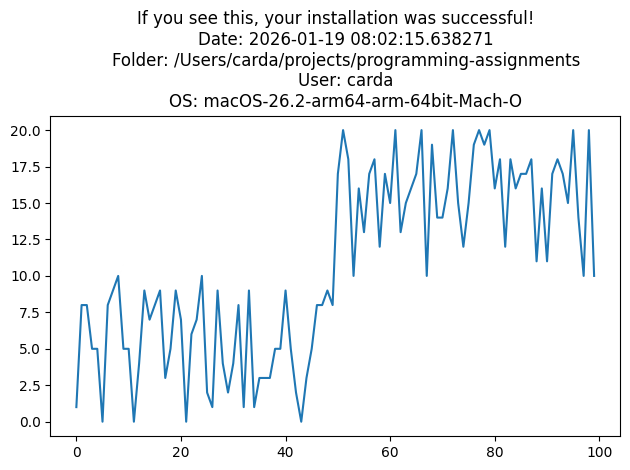

In [10]:
import matplotlib.pyplot as plt

numbers = []
for i in range(100):
    if i < 50:
        numbers.append(random.randint(0, 10))
    else:
        numbers.append(random.randint(10, 20))

plt.figure()
plt.title(
    f"""If you see this, your installation was successful!
    Date: {datetime.datetime.now()}
    Folder: {os.getcwd()}
    User: {getpass.getuser()}
    OS: {platform.platform()}"""
)
plt.plot(numbers)
plt.tight_layout()
plt.show()
plt.close()